In [17]:
import nltk

#nltk.download()

### 分词

In [1]:
from nltk.tokenize import word_tokenize
from nltk.text import Text

In [2]:
input_str = "Today's weather is good, we have no class in the afternoon. We will play basketball tomorrow."

In [3]:
word_tokens = word_tokenize(input_str)
tokens = [word.lower() for word in word_tokens]

In [4]:
tokens[:5]

['today', "'s", 'weather', 'is', 'good']

### Text对象

创建Text对象，方便后续操作

In [5]:
t = Text(tokens)

In [6]:
t.count('we') # 计数

2

In [7]:
t.index('no') # 定位

8

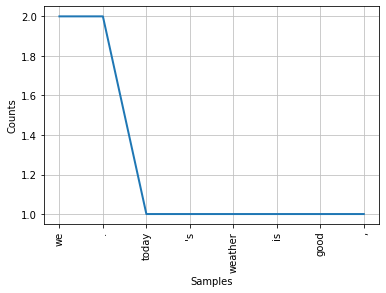

In [8]:
t.plot(8) # 前x多的词，词频

### 停用词

文档的说明：`stopwords.readme()`  
stopwords:停用词表

In [9]:
from nltk.corpus import stopwords

# 看一下英语的停用词
stopwords.raw('english').replace('\n', ' ')

"i me my myself we our ours ourselves you you're you've you'll you'd your yours yourself yourselves he him his himself she she's her hers herself it it's its itself they them their theirs themselves what which who whom this that that'll these those am is are was were be been being have has had having do does did doing a an the and but if or because as until while of at by for with about against between into through during before after above below to from up down in out on off over under again further then once here there when where why how all any both each few more most other some such no nor not only own same so than too very s t can will just don don't should should've now d ll m o re ve y ain aren aren't couldn couldn't didn didn't doesn doesn't hadn hadn't hasn hasn't haven haven't isn isn't ma mightn mightn't mustn mustn't needn needn't shan shan't shouldn shouldn't wasn wasn't weren weren't won won't wouldn wouldn't "

In [10]:
tokens_set = set(tokens)

# 交集
tokens_set.intersection(set(stopwords.words('english')))

{'have', 'in', 'is', 'no', 'the', 'we', 'will'}

In [11]:
# 过滤掉停用词
filtered_tokens_set = [w for w in tokens_set if w not in stopwords.words('english')]

filtered_tokens_set

['class',
 'tomorrow',
 'good',
 'play',
 'basketball',
 "'s",
 'today',
 'weather',
 ',',
 'afternoon',
 '.']

### 词性标注


In [12]:
from nltk import pos_tag

tags = pos_tag(tokens)

tags

[('today', 'NN'),
 ("'s", 'POS'),
 ('weather', 'NN'),
 ('is', 'VBZ'),
 ('good', 'JJ'),
 (',', ','),
 ('we', 'PRP'),
 ('have', 'VBP'),
 ('no', 'DT'),
 ('class', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('afternoon', 'NN'),
 ('.', '.'),
 ('we', 'PRP'),
 ('will', 'MD'),
 ('play', 'VB'),
 ('basketball', 'NN'),
 ('tomorrow', 'NN'),
 ('.', '.')]

### 分块

In [13]:
from nltk.chunk import RegexpParser

In [14]:
sentence = [('the', 'DT'), ('little', 'JJ'), ('yellow', 'JJ'), ('dog', 'NN'), ('died', 'VBD')] # 分完词的句子
grammer = "MY_NP: {<DT>?<JJ>*<NN>}" # 自定义规则
cp = RegexpParser(grammer) # 生成语法规则

result = cp.parse(sentence) # 进行分块
print(result)

#result.draw() # 调用matplotlib画出图

(S (MY_NP the/DT little/JJ yellow/JJ dog/NN) died/VBD)


### 命名实体识别

In [18]:
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\明月空悬\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\明月空悬\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [19]:
from nltk import ne_chunk

sentence = 'Edison went to Tsinghua University today.'

print(ne_chunk(pos_tag(word_tokenize(sentence))))

(S
  (PERSON Edison/NNP)
  went/VBD
  to/TO
  (ORGANIZATION Tsinghua/NNP University/NNP)
  today/NN
  ./.)


### 数据清洗

In [21]:
import re
from nltk.corpus import stopwords

# 输入数据
# 混杂了很多成分：网址，特殊字符，空格等
s = '    RT @Amila #Test\nTom\'s newly listed Co  &amp; Mary\'s unlisted      Group to supply tech for nlTK. \nh $TSLA $AAPL https:// t.co/x34afsfQsh'

# 指定停用词
cache_english_stopwords = stopwords.words('english')

In [22]:
# 数据清洗的功能
def text_clean(text):
    print('原始数据：', text, '\n')
    
    # 去掉HTML标签(eg. &amp;)
    text_no_special_entities = re.sub(r'\&\w*;|#\w*|@\w*', '', text)
    print('去掉特殊标签后的：', text_no_special_entities, '\n')
    
    # 去掉一些价值符号
    text_no_tickers = re.sub(r'\$\w*', '', text_no_special_entities)
    print('去掉价值符号后的：', text_no_tickers, '\n')
    
    # 去掉超链接
    text_no_hyperlinks = re.sub(r'https?:\/\/.*\/\w*', '', text_no_tickers)
    print('去掉超链接后的：', text_no_hyperlinks, '\n')
    
    # 去掉专门名词的缩写
    text_no_small_words = re.sub(r'\b\w{1,2}\b', '', text_no_hyperlinks) # 偷懒简单实现，一个或两个字母组成的单词
    print('去掉专门名词缩写后的：', text_no_small_words, '\n')
    
    # 去掉多余的空格
    text_no_whitespace = re.sub(r'\s\s+', ' ', text_no_small_words) # 大空格全都替换为1个space
    text_no_whitespace = text_no_whitespace.lstrip() # 去掉开头的所有空格
    print('去掉多余空格后的：', text_no_whitespace, '\n')
    
    # 分词
    tokens = word_tokenize(text_no_whitespace)
    print('分词结果：', tokens, '\n')
    
    # 去掉停用词
    list_no_stopwords = [i for i in tokens if i not in cache_english_stopwords]
    print('去掉停用词后的：', list_no_stopwords, '\n')
    
    # 过滤
    text_filtered = ' '.join(list_no_stopwords)
    print('过滤后的：', text_filtered, '\n')
    
text_clean(s)

原始数据：     RT @Amila #Test
Tom's newly listed Co  &amp; Mary's unlisted      Group to supply tech for nlTK. 
h $TSLA $AAPL https:// t.co/x34afsfQsh 

去掉特殊标签后的：     RT  
Tom's newly listed Co   Mary's unlisted      Group to supply tech for nlTK. 
h $TSLA $AAPL https:// t.co/x34afsfQsh 

去掉价值符号后的：     RT  
Tom's newly listed Co   Mary's unlisted      Group to supply tech for nlTK. 
h   https:// t.co/x34afsfQsh 

去掉超链接后的：     RT  
Tom's newly listed Co   Mary's unlisted      Group to supply tech for nlTK. 
h    

去掉专门名词缩写后的：       
Tom' newly listed    Mary' unlisted      Group  supply tech for nlTK. 
    

去掉多余空格后的： Tom' newly listed Mary' unlisted Group supply tech for nlTK.  

分词结果： ['Tom', "'", 'newly', 'listed', 'Mary', "'", 'unlisted', 'Group', 'supply', 'tech', 'for', 'nlTK', '.'] 

去掉停用词后的： ['Tom', "'", 'newly', 'listed', 'Mary', "'", 'unlisted', 'Group', 'supply', 'tech', 'nlTK', '.'] 

过滤后的： Tom ' newly listed Mary ' unlisted Group supply tech nlTK . 

